`models.regression` example
-----

### Load packages

In [1]:
from transparentai.models import regression
from transparentai.datasets import load_boston

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load & prepare data

In [2]:
data = load_boston()
X, Y = data.drop(columns='MEDV'), data['MEDV']

Split train test

In [3]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

### Train classifier

In [4]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prepare param

In [5]:
y_true       = Y_train
y_pred       = regr.predict(X_train)
y_true_valid = Y_valid
y_pred_valid = regr.predict(X_valid)

### Use `regression.compute_metrics` 

List of usable metrics on documentation.

You can add custom metrics ! with 
```python 
lambda y_true, y_pred: ...
```

In [6]:
metrics = ['MAE', 'MSE', 'RMSE', 'r2', lambda y_true, y_pred: sum(y_true-y_pred)]
regression.compute_metrics(y_true_valid, y_pred_valid, metrics)

{'MAE': 3.1482557548168266,
 'MSE': 20.724023437339728,
 'RMSE': 4.5523645984630585,
 'r2': 0.726157083655248,
 'custom_1': 33.78679013287808}

### Use `classification.plot_performance`

#### Only validation

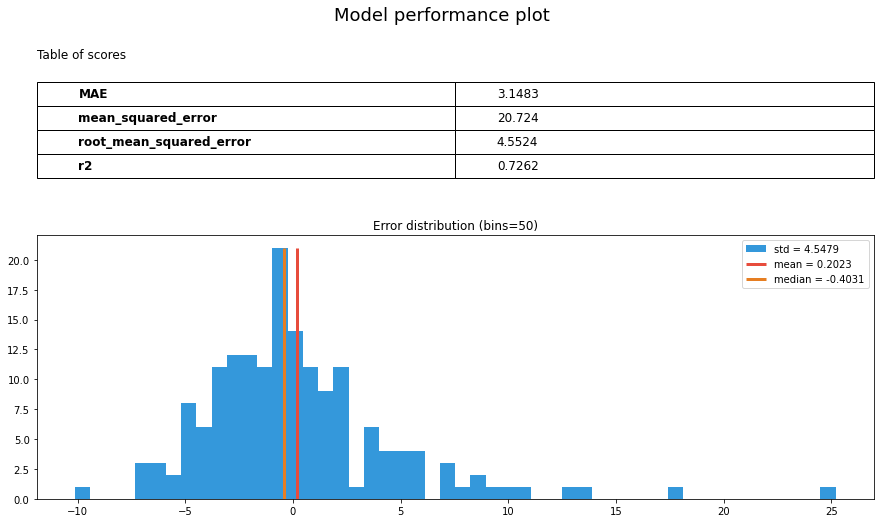

In [7]:
regression.plot_performance(y_true_valid, y_pred_valid)

#### Train set and validation

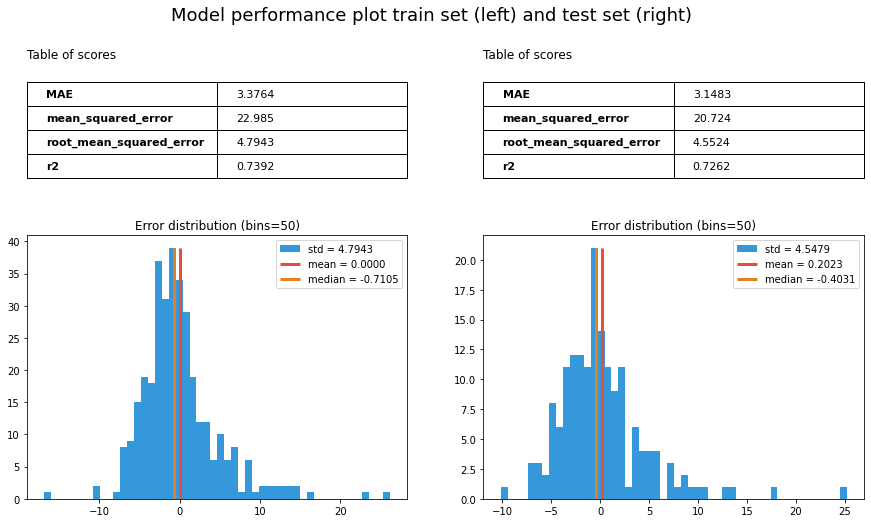

In [8]:
regression.plot_performance(y_true, y_pred, y_true_valid, y_pred_valid)